In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(0)
%matplotlib inline

In [2]:
N = 100 # количество генерируемых выборок
n = 50  # размер выборок
θ = 1   # параметр 

k_range = np.concatenate((np.arange(1,6), np.arange(10, 110, 10)))

## Непрерывное равномерное распределение: $U[0,\theta]$
$$\alpha_k(\theta) = \frac{1}{\theta}\int_0^\theta x^k = \frac{\theta^k}{k+1}$$
$$\frac{1}{n}\sum_{i=1}^nx_i^k = \frac{\theta^k}{k+1}$$
$$\theta = \sqrt[k]{\frac{k+1}{n}\sum_{i=1}^nx_i^k}$$

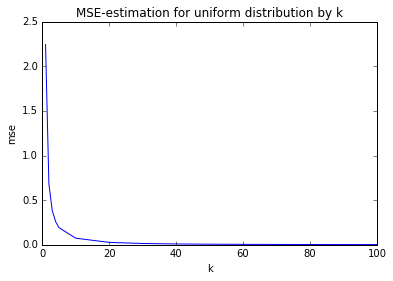

In [3]:
X_uniform = np.random.uniform(0, θ, n*N).reshape(N, n)

mse = []

for k in k_range:
    m_k = np.power(X_uniform, k).mean(axis=1)
    T = np.power(m_k + (k+1), 1/k)
    mse.append(np.power(T-θ, 2).mean())
    
plt.plot(k_range, mse)
plt.ylabel('mse')
plt.xlabel('k')
plt.title('MSE-estimation for uniform distribution by k')
plt.show()

## Экспоненциальное распределение: $Exp(\theta)$

$$\alpha_k(\theta) = \frac{1}{\theta}\int_0^\infty x^k e^{-\frac{x}{\theta}} = 
\theta^k\int_0^\infty \frac{x}{\theta}^k e^{-\frac{x}{\theta}} \frac{1}{\theta} =
\theta^k \int_0^\infty x^k e^{-x} = \theta^k \Gamma(k+1) $$

$$\frac{1}{n}\sum_{i=1}^nx_i^k = \theta^k \Gamma(k+1)$$
$$\theta = \sqrt[k]{\frac{\sum_{i=1}^nx_i^k}{n \Gamma(k+1)}}$$

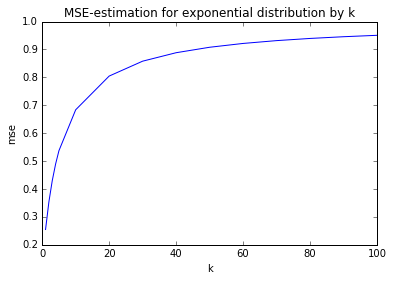

In [4]:
X_exponential = np.random.exponential(θ, n*N).reshape(N, n)

mse = []

for k in k_range:
    m_k = np.power(X_uniform, k).mean(axis=1)
    T = np.power(m_k / math.gamma(k+1), 1/k)
    mse.append(np.power(T-θ, 2).mean())
    
plt.plot(k_range, mse)
plt.ylabel('mse')
plt.xlabel('k')
plt.title('MSE-estimation for exponential distribution by k')
plt.show()

## Распределение Рэлея

$$\alpha_k(\theta) = \int_0^\infty x^k \frac{x}{\theta^2} e^{-\frac{x^2}{2\theta^2}} = 
(\sqrt{2})^k \theta^k \int_0^\infty x^\frac{k}{2} e^{-x} = 
(\sqrt{2})^k \theta^k \Gamma(\frac{k}{2}+1) $$

$$\frac{1}{n}\sum_{i=1}^nx_i^k = (\sqrt{2})^k \theta^k \Gamma(\frac{k}{2}+1) $$
$$\theta = \frac{1}{\sqrt{2}} \sqrt[k]{\frac{\sum_{i=1}^nx_i^k}{n \Gamma(\frac{k}{2}+1)}}$$

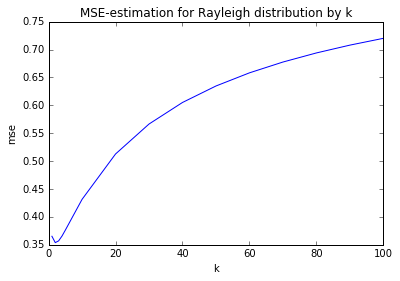

In [5]:
X_rayleigh = np.random.rayleigh(θ, n*N).reshape(N, n)

mse = []

for k in k_range:
    m_k = np.power(X_uniform, k).mean(axis=1)
    T = np.power(m_k / math.gamma(k/2+1), 1/k) / np.sqrt(2)
    mse.append(np.power(T-θ, 2).mean())
    
plt.plot(k_range, mse)
plt.ylabel('mse')
plt.xlabel('k')
plt.title('MSE-estimation for Rayleigh distribution by k')
plt.show()